# UTS IBDA3112 - Business Analytics & Intelligence
### Kelompok 1
Anggota:
1. Michael David Hanitio (191900564)
2. Reszisca Valentiana (191900702)

# 1. Business Requirement<br>
Manajemen Perusahaan Northwind ingin menjaga loyalitas pelanggan, memperluas pasar, dan meningkatkan penjualan. Perusahaan Northwind meminta bantuan dalam melakukan analisa bisnis untuk membantu pihak manajemen perusahaan mengambil keputusan bisnis.

# 2. Extract the Data

In [1]:
!pip install pandasql
!pip install openpyxl

  Preparing metadata (setup.py) ... - done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=3b67c3ca437374e3a7b1fdac741063f8c1d8c5398469c9e8e7637c80e50b3da3
  Stored in directory: /home/datalore/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 242 kB 29.4 MB/s            
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

pysqldf = lambda q: sqldf(q, globals())

In [3]:
customers = pd.read_excel('Customers.xlsx')
order_details = pd.read_excel('Order Details.xlsx')
orders = pd.read_excel('Orders.xlsx')
products = pd.read_excel('Products.xlsx')
suppliers = pd.read_excel('Suppliers.xlsx')
shippers = pd.read_excel('Shippers.xlsx')

In [4]:
customers.columns = map(lambda x : x.replace(" ", ""), customers.columns)
order_details.columns = map(lambda x : x.replace(" ", ""), order_details.columns)
orders.columns = map(lambda x : x.replace(" ", ""), orders.columns)
products.columns = map(lambda x : x.replace(" ", ""), products.columns)
suppliers.columns = map(lambda x : x.replace(" ", ""), suppliers.columns)
shippers.columns = map(lambda x : x.replace(" ", ""), shippers.columns)

# 3. Analyze the Data
Dataset Northwind berisi data penjualan impor dan ekspor makanan khusus dari seluruh dunia. Dataset Northwind tersebut terdiri dari 8 tabel, di antara nya yaitu:
1. Suppliers: Pemasok dari produk Northwind
2. Customers: Pelanggan yang pernah membeli produk Northwind
3. Employees: Karyawan yang memasarkan produk Northwind
4. Products: Informasi produk Northwind
5. Categories: Kategori produk Northwind
6. Shippers: Pengirim yang mengirimkan produk dari penjual ke pelanggan
7. Orders dan Order_Details: Transaksi yang terjadi antara penjual dengan pelanggan beserta detailnya

Berikut dapat dilihat seluruh tabel yang terdapat pada dataset Northwind.

In [5]:
suppliers

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,NaN,CAJUN.HTM
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,NaN
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai\nMusashino-shi,Tokyo,NaN,100,Japan,(03) 3555-5011,NaN,NaN
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko\nChuo-ku,Osaka,NaN,545,Japan,(06) 431-7877,NaN,Mayumi's (on the World Wide Web)
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St.\nMoonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,NaN
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,NaN,M14 GSD,UK,(161) 555-4448,NaN,NaN
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,NaN,S-345 67,Sweden,031-987 65 43,031-987 65 91,NaN
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,São Paulo,NaN,5442,Brazil,(11) 555 4640,NaN,NaN


In [6]:
customers

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,NaN,90110,Finland,981-443655,981-443655
87,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,NaN
88,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S.\nSuite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858


In [7]:
products

,ProductID,ProductName,Supplier,Category,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,Exotic Liquids,Beverages,10 boxes x 20 bags,18.00,39,0,10,False
1,2,Chang,Exotic Liquids,Beverages,24 - 12 oz bottles,19.00,17,40,25,False
2,3,Aniseed Syrup,Exotic Liquids,Condiments,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,New Orleans Cajun Delights,Condiments,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,New Orleans Cajun Delights,Condiments,36 boxes,21.35,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,Svensk Sjöföda AB,Seafood,24 - 150 g jars,15.00,101,0,5,False
73,74,Longlife Tofu,Tokyo Traders,Produce,5 kg pkg.,10.00,4,20,5,False
74,75,Rhönbräu Klosterbier,Plutzer Lebensmittelgroßmärkte AG,Beverages,24 - 0.5 l bottles,7.75,125,0,25,False
75,76,Lakkalikööri,Karkki Oy,Beverages,500 ml,18.00,57,0,20,False


In [8]:
shippers

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [9]:
orders

,OrderID,Customer,Employee,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,Vins et alcools Chevalier,"Buchanan, Steven",1994-08-04,1994-09-01,1994-08-16,Federal Shipping,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,Toms Spezialitäten,"Suyama, Michael",1994-08-05,1994-09-16,1994-08-10,Speedy Express,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,Hanari Carnes,"Peacock, Margaret",1994-08-08,1994-09-05,1994-08-12,United Package,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,Victuailles en stock,"Leverling, Janet",1994-08-08,1994-09-05,1994-08-15,Speedy Express,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,Suprêmes délices,"Peacock, Margaret",1994-08-09,1994-09-06,1994-08-11,United Package,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,Pericles Comidas clásicas,"Fuller, Andrew",1996-06-04,1996-07-02,NaT,United Package,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,NaN,05033,Mexico
826,11074,Simons bistro,"King, Robert",1996-06-05,1996-07-03,NaT,United Package,18.44,Simons bistro,Vinbæltet 34,København,NaN,1734,Denmark
827,11075,Richter Supermarkt,"Callahan, Laura",1996-06-05,1996-07-03,NaT,United Package,6.19,Richter Supermarkt,Starenweg 5,Genève,NaN,1204,Switzerland
828,11076,Bon app',"Peacock, Margaret",1996-06-05,1996-07-03,NaT,United Package,38.28,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France


In [10]:
order_details

,OrderID,Product,UnitPrice,Quantity,Discount
0,10248,Queso Cabrales,14.00,12,0.00
1,10248,Singaporean Hokkien Fried Mee,9.80,10,0.00
2,10248,Mozzarella di Giovanni,34.80,5,0.00
3,10249,Tofu,18.60,9,0.00
4,10249,Manjimup Dried Apples,42.40,40,0.00
...,...,...,...,...,...
2150,11077,Wimmers gute Semmelknödel,33.25,2,0.03
2151,11077,Louisiana Hot Spiced Okra,17.00,1,0.00
2152,11077,Röd Kaviar,15.00,2,0.01
2153,11077,Rhönbräu Klosterbier,7.75,4,0.00


# 4. Understand the Pattern and Predict Future Outcomes

### a. Produk mana yang mencatatkan volume dan total penjualan tertinggi tiap tahun selama 3 tahun (1994-1996)? <br> Berapa perkiraan penjualannya pada tahun 1997-2000?

Produk dengan <b>volume tertinggi</b> tiap tahun selama 3 tahun (1994-1996):

In [11]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1994'
GROUP BY Year, order_details.Product
ORDER BY TotalSold DESC
LIMIT 1;
""")

,Year,Product,TotalSold
0,1994,Gorgonzola Telino,280


In [12]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1995'
GROUP BY Year, order_details.Product
ORDER BY TotalSold DESC
LIMIT 1;
""")

,Year,Product,TotalSold
0,1995,Gnocchi di nonna Alice,909


In [13]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1996'
GROUP BY Year, order_details.Product
ORDER BY TotalSold DESC
LIMIT 1;
""")

,Year,Product,TotalSold
0,1996,Konbu,679


Produk yang mencatatkan <b>volume</b> tertinggi tiap tahun selama 3 tahun (1994-1996):
1. Tahun 1994: Gorgonzola Telino
2. Tahun 1995: Gnocchi di nonna Alice
3. Tahun 1996: Konbu

Berikut merupakan <b>prediksi volume</b> produk Gorgonzola Telino sampai tahun 2000:

In [14]:
gorgonzola_volume = pysqldf("""
SELECT strftime('%Y-%m', orders.OrderDate) AS Month,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE order_details.Product = 'Gorgonzola Telino'
GROUP BY Month, order_details.Product
ORDER BY Month ASC
""")
gorgonzola_volume

,Month,Product,TotalSold
0,1994-08,Gorgonzola Telino,20
1,1994-09,Gorgonzola Telino,55
2,1994-11,Gorgonzola Telino,85
3,1994-12,Gorgonzola Telino,120
4,1995-01,Gorgonzola Telino,164
5,1995-02,Gorgonzola Telino,14
6,1995-03,Gorgonzola Telino,3
7,1995-04,Gorgonzola Telino,35
8,1995-05,Gorgonzola Telino,20
9,1995-06,Gorgonzola Telino,135


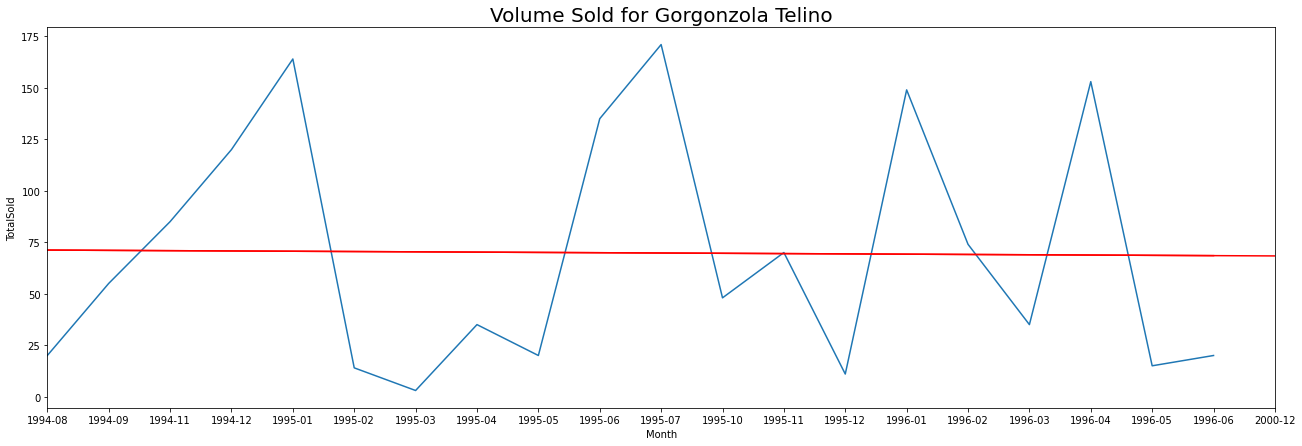

In [15]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
given_date = max(gorgonzola_volume.Month)
date_format = '%Y-%m'
dtObj = datetime.strptime(given_date, date_format)
n = 54
future_date = dtObj + relativedelta(months=n)
future_date_str = future_date.strftime(date_format)

x = range(0, len(gorgonzola_volume.Month))
z_range = range(0, len(gorgonzola_volume.Month) + n)
plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=gorgonzola_volume, x="Month", y="TotalSold")
plot.set_title('Volume Sold for Gorgonzola Telino', fontsize=20)

z = np.polyfit(x, gorgonzola_volume.TotalSold, 1)
p = np.poly1d(z)
plt.xlim(min(gorgonzola_volume.Month), future_date_str)

plt.plot(gorgonzola_volume.Month, p(x), c="r")
plt.plot(z_range, np.polyval(p,z_range),'r-')

Berikut merupakan <b>prediksi volume</b> produk Gnocchi di nonna Alice sampai tahun 2000:

In [16]:
gnocchi_volume = pysqldf("""
SELECT strftime('%Y-%m', orders.OrderDate) AS Month,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE order_details.Product = 'Gnocchi di nonna Alice'
GROUP BY Month, order_details.Product
ORDER BY Month ASC
""")
gnocchi_volume

,Month,Product,TotalSold
0,1994-08,Gnocchi di nonna Alice,2
1,1994-10,Gnocchi di nonna Alice,24
2,1994-11,Gnocchi di nonna Alice,12
3,1994-12,Gnocchi di nonna Alice,20
4,1995-01,Gnocchi di nonna Alice,38
5,1995-02,Gnocchi di nonna Alice,75
6,1995-03,Gnocchi di nonna Alice,113
7,1995-04,Gnocchi di nonna Alice,50
8,1995-05,Gnocchi di nonna Alice,154
9,1995-06,Gnocchi di nonna Alice,30


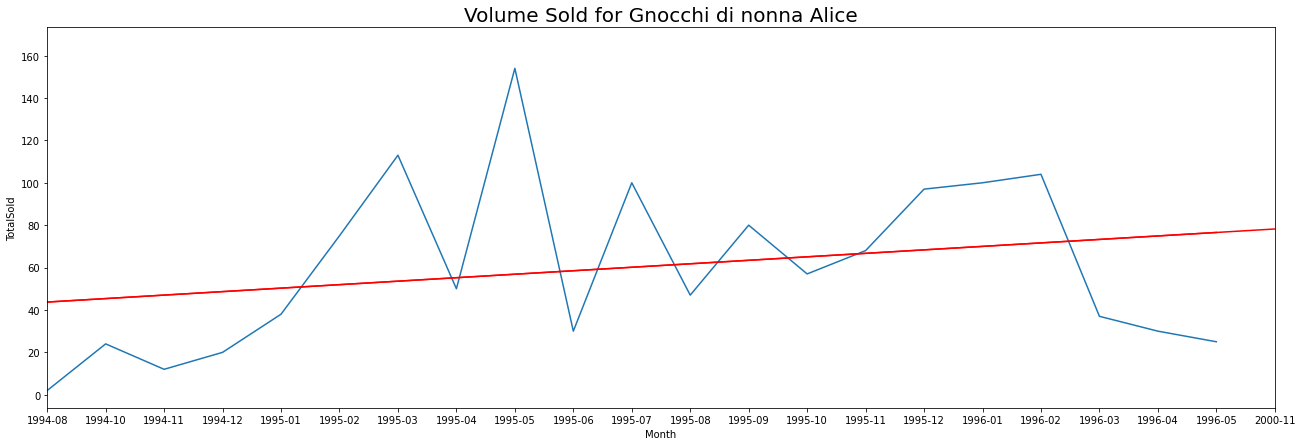

In [17]:
given_date = max(gnocchi_volume.Month)
date_format = '%Y-%m'
dtObj = datetime.strptime(given_date, date_format)
n = 54
future_date = dtObj + relativedelta(months=n)
future_date_str = future_date.strftime(date_format)

x = range(0, len(gnocchi_volume.Month))
z_range = range(0, len(gnocchi_volume.Month) + n)
plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=gnocchi_volume, x="Month", y="TotalSold")
plot.set_title('Volume Sold for Gnocchi di nonna Alice', fontsize=20)

z = np.polyfit(x, gnocchi_volume.TotalSold, 1)
p = np.poly1d(z)
plt.xlim(min(gnocchi_volume.Month), future_date_str)

plt.plot(gnocchi_volume.Month, p(x), c="r")
plt.plot(z_range, np.polyval(p,z_range),'r-')

Berikut merupakan <b>prediksi volume</b> produk Konbu sampai tahun 2000:

In [18]:
konbu_volume = pysqldf("""
SELECT strftime('%Y-%m', orders.OrderDate) AS Month,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE order_details.Product = 'Konbu'
GROUP BY Month, order_details.Product
ORDER BY Month ASC
""")
konbu_volume

,Month,Product,TotalSold
0,1994-09,Konbu,30
1,1994-11,Konbu,12
2,1995-01,Konbu,48
3,1995-02,Konbu,2
4,1995-04,Konbu,1
5,1995-05,Konbu,10
6,1995-06,Konbu,18
7,1995-08,Konbu,68
8,1995-09,Konbu,13
9,1995-12,Konbu,10


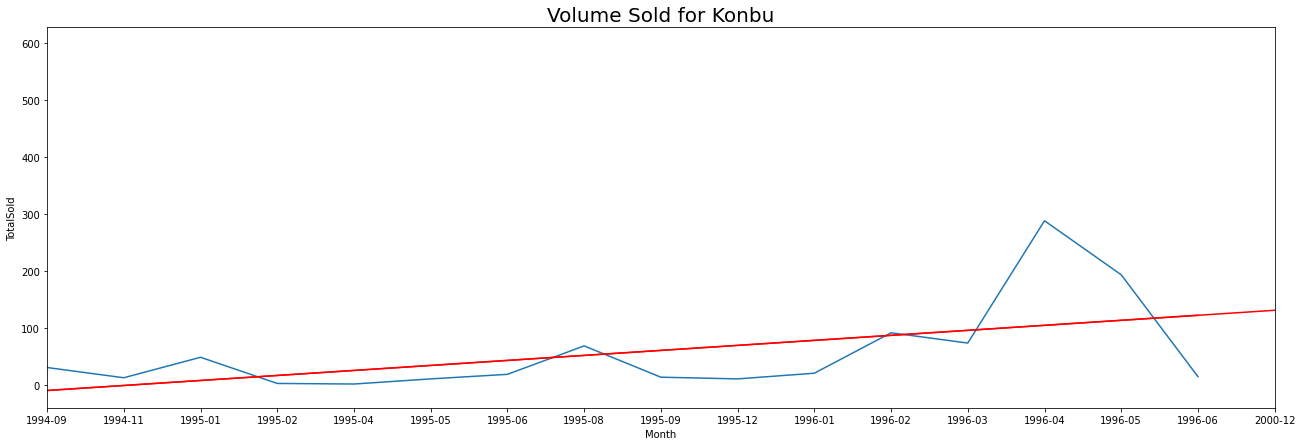

In [19]:
given_date = max(konbu_volume.Month)
date_format = '%Y-%m'
dtObj = datetime.strptime(given_date, date_format)
n = 54
future_date = dtObj + relativedelta(months=n)
future_date_str = future_date.strftime(date_format)

x = range(0, len(konbu_volume.Month))
z_range = range(0, len(konbu_volume.Month) + n)
plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=konbu_volume, x="Month", y="TotalSold")
plot.set_title('Volume Sold for Konbu', fontsize=20)

z = np.polyfit(x, konbu_volume.TotalSold, 1)
p = np.poly1d(z)
plt.xlim(min(konbu_volume.Month), future_date_str)

plt.plot(konbu_volume.Month, p(x), c="r")
plt.plot(z_range, np.polyval(p,z_range),'r-')

Produk dengan <b>total penjualan tertinggi</b> tiap tahun selama 3 tahun (1994-1996):

In [20]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.UnitPrice * order_details.Quantity * (1 - order_details.Discount)) AS TotalSales
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1994'
GROUP BY Year, order_details.Product
ORDER BY TotalSales DESC
LIMIT 1;
""")

,Year,Product,TotalSales
0,1994,Côte de Blaye,18550.4


In [21]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.UnitPrice * order_details.Quantity * (1 - order_details.Discount)) AS TotalSales
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1995'
GROUP BY Year, order_details.Product
ORDER BY TotalSales DESC
LIMIT 1;
""")

,Year,Product,TotalSales
0,1995,Côte de Blaye,51569.585


In [22]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.UnitPrice * order_details.Quantity * (1 - order_details.Discount)) AS TotalSales
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1996'
GROUP BY Year, order_details.Product
ORDER BY TotalSales DESC
LIMIT 1;
""")

,Year,Product,TotalSales
0,1996,Côte de Blaye,71276.75


Produk yang mencatatkan <b>total penjualan</b> tertinggi tiap tahun selama 3 tahun (1994-1996): <b>Côte de Blaye</b>

Berikut merupakan <b>prediksi total penjualan</b> sampai tahun 2000 untuk produk Côte de Blaye:

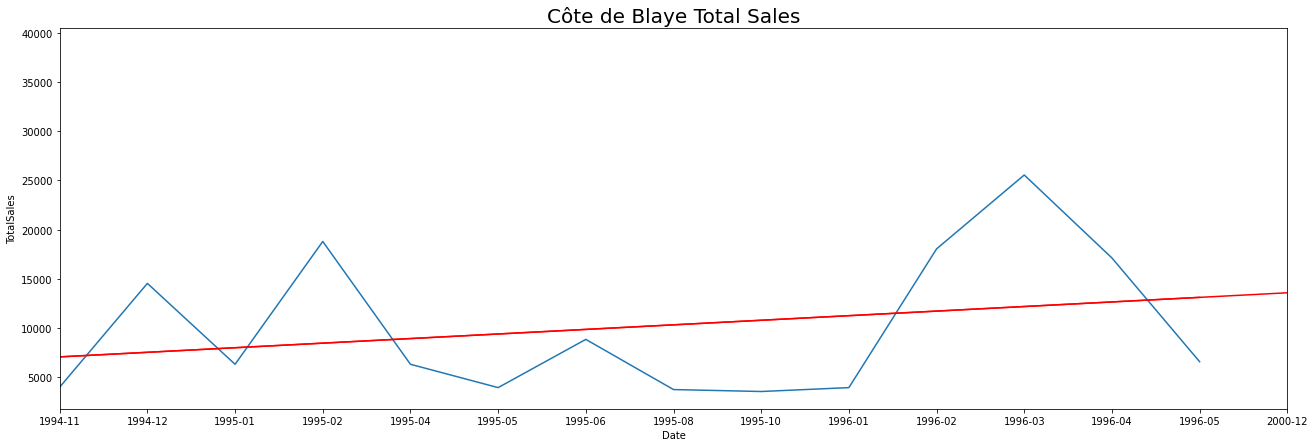

In [23]:
product_sold = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) AS TotalSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
WHERE d.Product = 'Côte de Blaye'
GROUP BY Date;
""")


given_date = max(product_sold.Date)
date_format = '%Y-%m'
dtObj = datetime.strptime(given_date, date_format)
n = 55
future_date = dtObj + relativedelta(months=n)
future_date_str = future_date.strftime(date_format)

x = range(0, len(product_sold.Date))
z_range = range(0, len(product_sold.Date) + n)
plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=product_sold, x="Date", y="TotalSales")
plot.set_title('Côte de Blaye Total Sales', fontsize=20)

z = np.polyfit(x, product_sold.TotalSales, 1)
p = np.poly1d(z)
plt.xlim(min(product_sold.Date), future_date_str)

plt.plot(product_sold.Date, p(x), c="r")
plt.plot(z_range, np.polyval(p,z_range),'r-')

### b. Produk mana yang mencatatkan rata-rata volume penjualan tertinggi tiap bulan selama 3 tahun (1994-1996)?

In [24]:
product_quantity_sales = pysqldf("""
SELECT strftime('%Y-%m', orders.OrderDate) AS date,
    order_details.Product,
    SUM(order_details.Quantity) AS total_quantity
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
GROUP BY date;
""")

In [25]:
product_quantity_sales["average_sales"] = 0

In [26]:
from calendar import monthrange

for i in range(len(product_quantity_sales)):
    year_month = product_quantity_sales["date"][i].split('-')
    year = int(year_month[0])
    month = int(year_month[1])
    num_days = monthrange(year, month)[1]
    product_quantity_sales["average_sales"][i] = product_quantity_sales["total_quantity"][i]/num_days
    
product_quantity_sales

<ipython-input-26-06632104579c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_quantity_sales["average_sales"][i] = product_quantity_sales["total_quantity"][i]/num_days


,date,Product,total_quantity,average_sales
0,1994-08,Queso Cabrales,1462,47
1,1994-09,Inlagd Sill,1322,44
2,1994-10,Gnocchi di nonna Alice,1124,36
3,1994-11,Jack's New England Clam Chowder,1669,55
4,1994-12,Wimmers gute Semmelknödel,1804,58
5,1995-01,Thüringer Rostbratwurst,2200,70
6,1995-02,Thüringer Rostbratwurst,1951,69
7,1995-03,Valkoinen suklaa,2582,83
8,1995-04,Konbu,1622,54
9,1995-05,Raclette Courdavault,2060,66


Produk yang mencatat rata-rata volume penjualan tertinggi tiap bulan selama 3 tahun (1994-1996): <b>Sir Rodney's Scones</b>

### c. Supplier mana yang memasok produk dalam pertanyaan a?

In [27]:
pysqldf("""
SELECT T2.company_name, T2.product_name
FROM (SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1994'
GROUP BY Year, order_details.Product
ORDER BY TotalSold DESC
LIMIT 1) AS T1
JOIN (SELECT suppliers.CompanyName AS company_name,
    products.ProductName AS product_name
    FROM suppliers
    INNER JOIN products
        ON products.Supplier = suppliers.CompanyName) AS T2
WHERE T1.Product = T2.product_name;
""")

,company_name,product_name
0,Formaggi Fortini s.r.l.,Gorgonzola Telino


In [28]:
pysqldf("""
SELECT T2.company_name, T2.product_name
FROM (SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1995'
GROUP BY Year, order_details.Product
ORDER BY TotalSold DESC
LIMIT 1) AS T1
JOIN (SELECT suppliers.CompanyName AS company_name,
    products.ProductName AS product_name
    FROM suppliers
    INNER JOIN products
        ON products.Supplier = suppliers.CompanyName) AS T2
WHERE T1.Product = T2.product_name;
""")

,company_name,product_name
0,Pasta Buttini s.r.l.,Gnocchi di nonna Alice


In [29]:
pysqldf("""
SELECT T2.company_name, T2.product_name
FROM (SELECT strftime('%Y', orders.OrderDate) AS Year,
    order_details.Product,
    SUM(order_details.Quantity) AS TotalSold
FROM order_details
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1996'
GROUP BY Year, order_details.Product
ORDER BY TotalSold DESC
LIMIT 1) AS T1
JOIN (SELECT suppliers.CompanyName AS company_name,
    products.ProductName AS product_name
    FROM suppliers
    INNER JOIN products
        ON products.Supplier = suppliers.CompanyName) AS T2
WHERE T1.Product = T2.product_name;
""")

,company_name,product_name
0,Mayumi's,Konbu


Supplier yang memasok produk dari pertanyaan a:
1. Formaggi Fortini s.r.l. (Gorgonzola Telino)
2. Pasta Buttini s.r.l. (Gnocchi di nonna Alice)
3. Mayumi's (Konbu)

### d. Supplier mana yang total nilai pasokannya tertinggi setiap tahun selama 3 tahun (1994-1996)?

In [30]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    products.Supplier,
    COUNT(products.Supplier) AS SupplyQuantity
FROM suppliers
INNER JOIN products
    ON products.Supplier = suppliers.CompanyName
INNER JOIN order_details
    ON order_details.Product = products.ProductName
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1994'
GROUP BY products.Supplier
ORDER BY SupplyQuantity DESC
LIMIT 1;
""")

,Year,Supplier,SupplyQuantity
0,1994,"Pavlova, Ltd.",27


In [31]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    products.Supplier,
    COUNT(products.Supplier) AS SupplyQuantity
FROM suppliers
INNER JOIN products
    ON products.Supplier = suppliers.CompanyName
INNER JOIN order_details
    ON order_details.Product = products.ProductName
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1995'
GROUP BY products.Supplier
ORDER BY SupplyQuantity DESC
LIMIT 1;
""")

,Year,Supplier,SupplyQuantity
0,1995,Plutzer Lebensmittelgroßmärkte AG,82


In [32]:
pysqldf("""
SELECT strftime('%Y', orders.OrderDate) AS Year,
    products.Supplier,
    COUNT(products.Supplier) AS SupplyQuantity
FROM suppliers
INNER JOIN products
    ON products.Supplier = suppliers.CompanyName
INNER JOIN order_details
    ON order_details.Product = products.ProductName
INNER JOIN orders
    ON orders.OrderID = order_details.OrderID
WHERE Year = '1996'
GROUP BY products.Supplier
ORDER BY SupplyQuantity DESC
LIMIT 1;
""")

,Year,Supplier,SupplyQuantity
0,1996,Plutzer Lebensmittelgroßmärkte AG,71


Supplier dengan nilai pasokan tertinggi setiap tahun selama 3 tahun (1994-1996):
1. Tahun 1994: Pavlova, Ltd.
2. Tahun 1995: Plutzer Lebensmittelgroßmärkte AG
3. Tahun 1996: Plutzer Lebensmittelgroßmärkte AG

### e. Produk mana saja yang memiliki kecenderungan penjualan rata-rata bulanan naik dan mana yang cenderung menurun?

Dalam analisa ini, kami <em>tidak melihat penjualan rata-rata bulanan untuk setiap produk</em> karena jumlah produk terlalu banyak, yaitu sebanyak 77. Oleh karena itu, sebagai alternatif, kami menggunakan kategori produk (8) untuk dilihat penjualan rata-rata bulanannya.

Berikut merupakan penjualan rata-rata bulanan untuk <b>seluruh</b> kategori produk:

In [33]:
avgsales_by_cat = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    p.Category,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
GROUP BY Date, p.Category;
""")

avgsales_by_cat

,Date,Category,AverageSales
0,1994-08,Beverages,11.700368
1,1994-08,Condiments,13.512230
2,1994-08,Confections,23.572041
3,1994-08,Dairy Products,22.494539
4,1994-08,Grains/Cereals,15.142892
...,...,...,...
179,1996-06,Dairy Products,17.946286
180,1996-06,Grains/Cereals,32.492684
181,1996-06,Meat/Poultry,24.000000
182,1996-06,Produce,25.275167


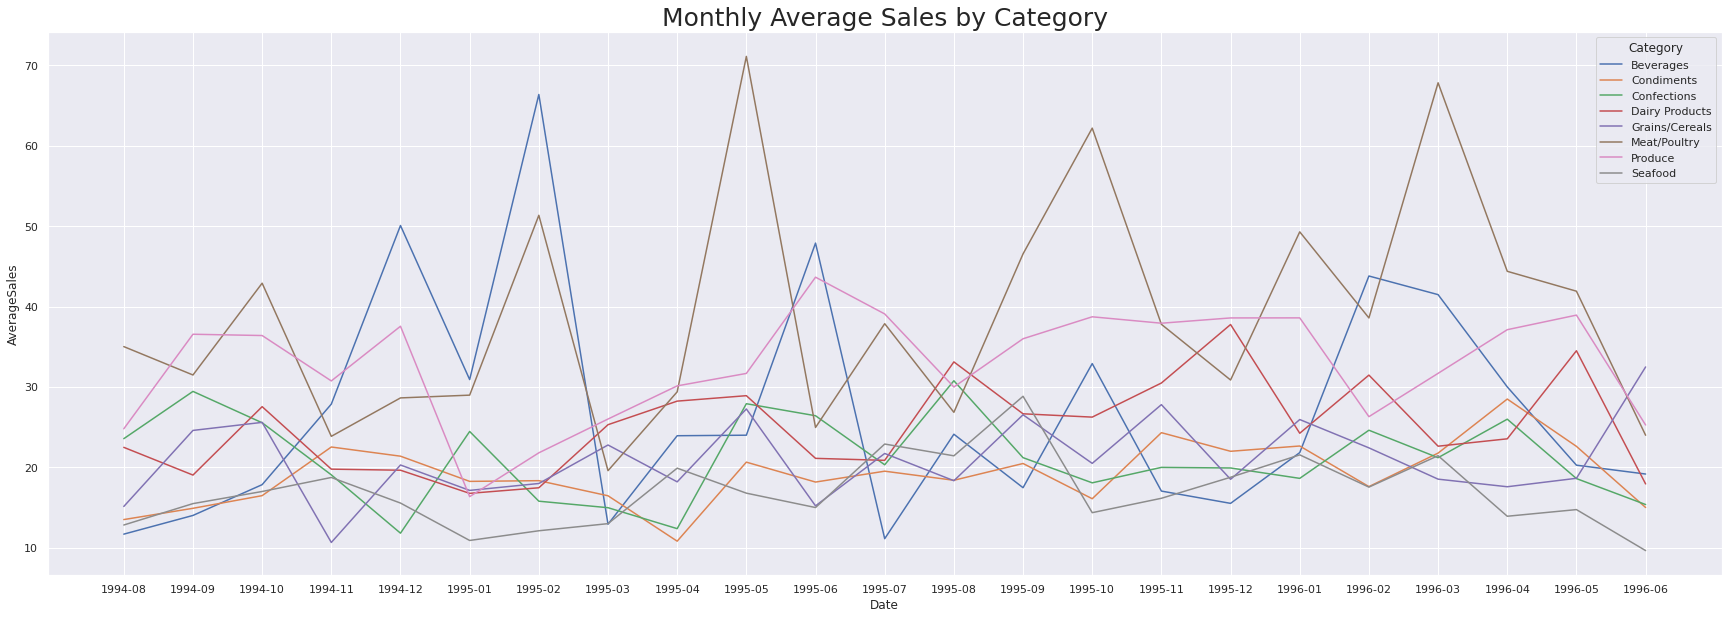

In [34]:
sns.set(rc={'figure.figsize':(30,10)})

plot = sns.lineplot(data=avgsales_by_cat, x="Date", y="AverageSales", hue='Category')
plot.set_title('Monthly Average Sales by Category', fontsize=25)

Berikut merupakan penjualan rata-rata bulanan untuk <b>masing-masing</b> kategori produk:

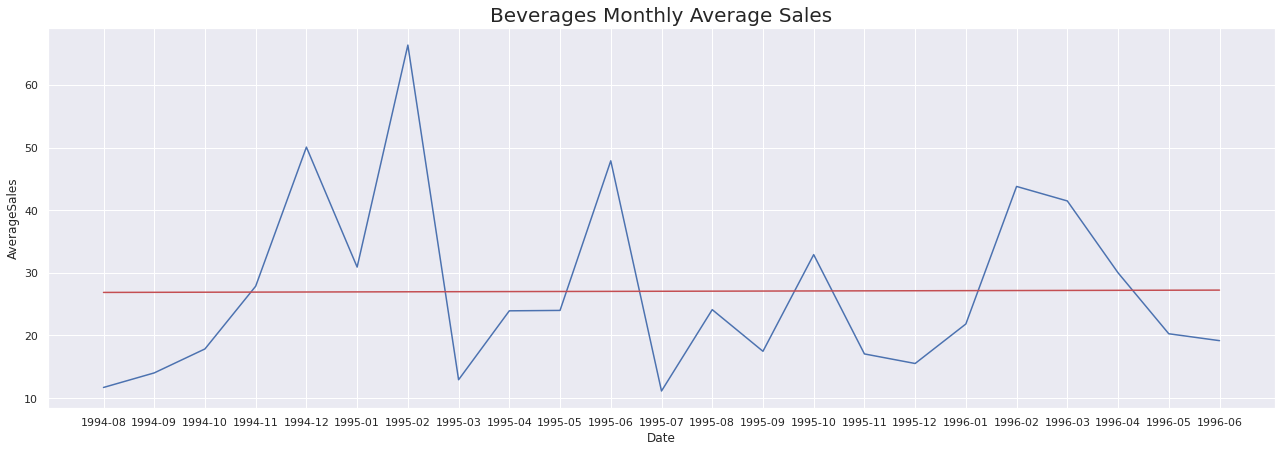

In [35]:
avgsales_bvg = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Beverages'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_bvg.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_bvg, x="Date", y="AverageSales")
plot.set_title('Beverages Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_bvg.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_bvg.Date, p(x), c="r")

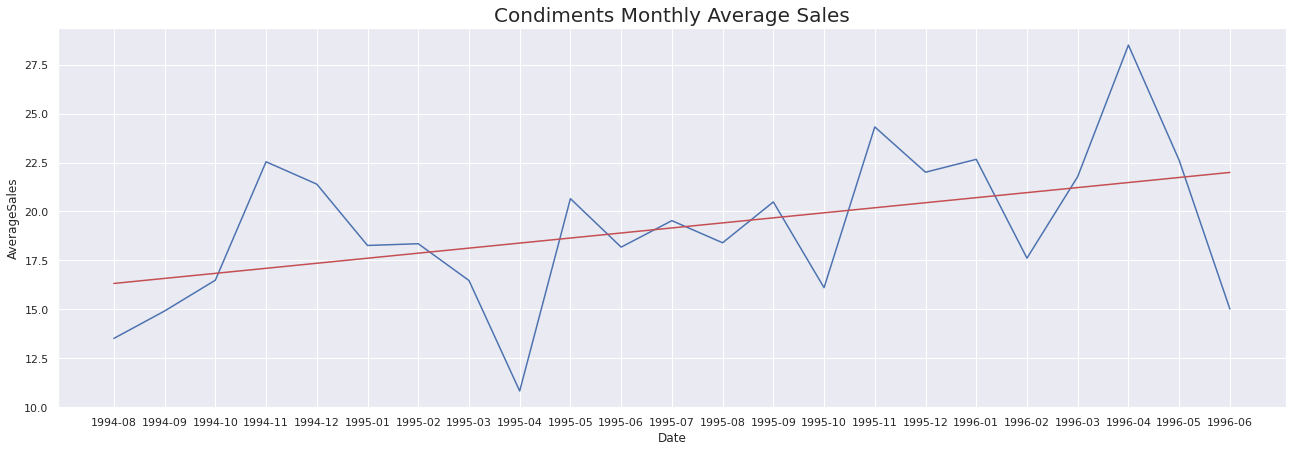

In [36]:
avgsales_cdm = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Condiments'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_cdm.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_cdm, x="Date", y="AverageSales")
plot.set_title('Condiments Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_cdm.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_cdm.Date, p(x), c="r")

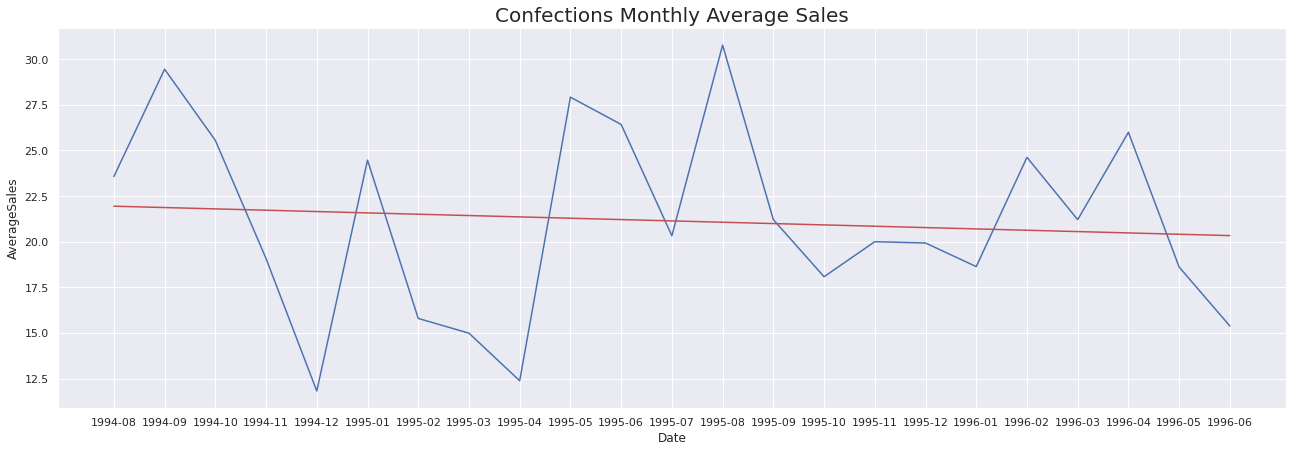

In [37]:
avgsales_cft = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Confections'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_cft.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_cft, x="Date", y="AverageSales")
plot.set_title('Confections Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_cft.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_cft.Date, p(x), c="r")

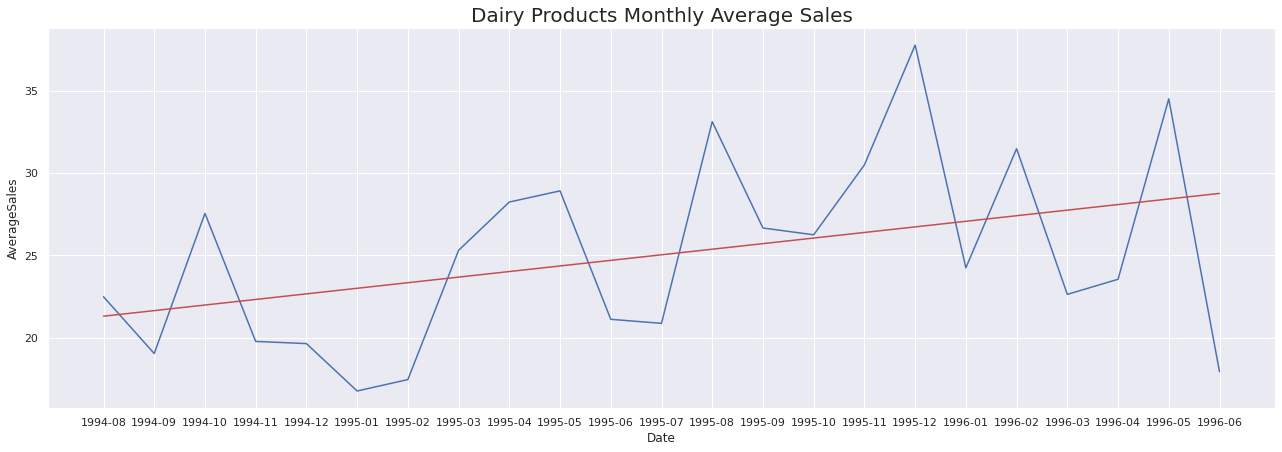

In [38]:
avgsales_drp = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Dairy Products'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_drp.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_drp, x="Date", y="AverageSales")
plot.set_title('Dairy Products Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_drp.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_drp.Date, p(x), c="r")

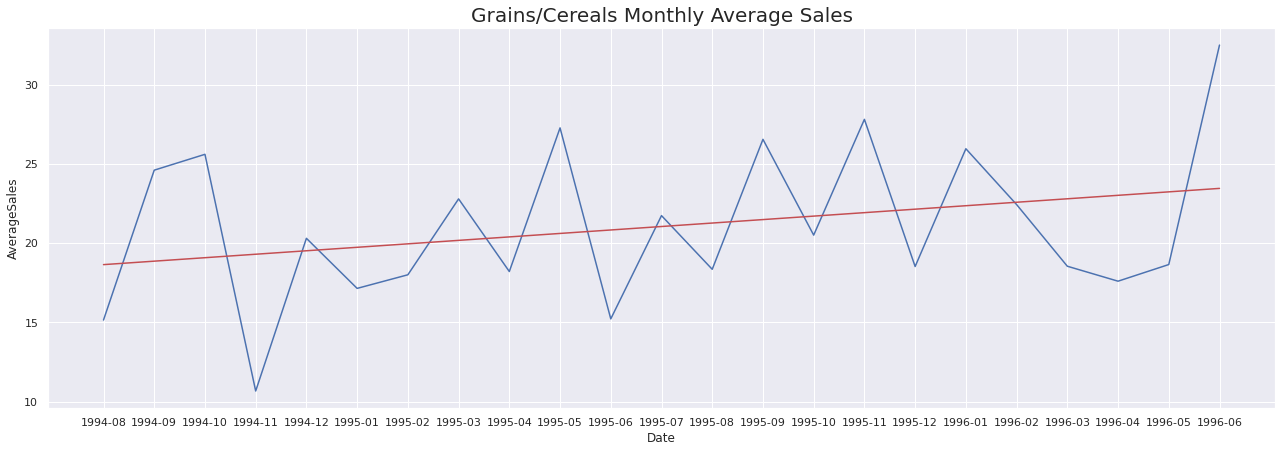

In [39]:
avgsales_grc = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Grains/Cereals'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_grc.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_grc, x="Date", y="AverageSales")
plot.set_title('Grains/Cereals Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_grc.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_grc.Date, p(x), c="r")

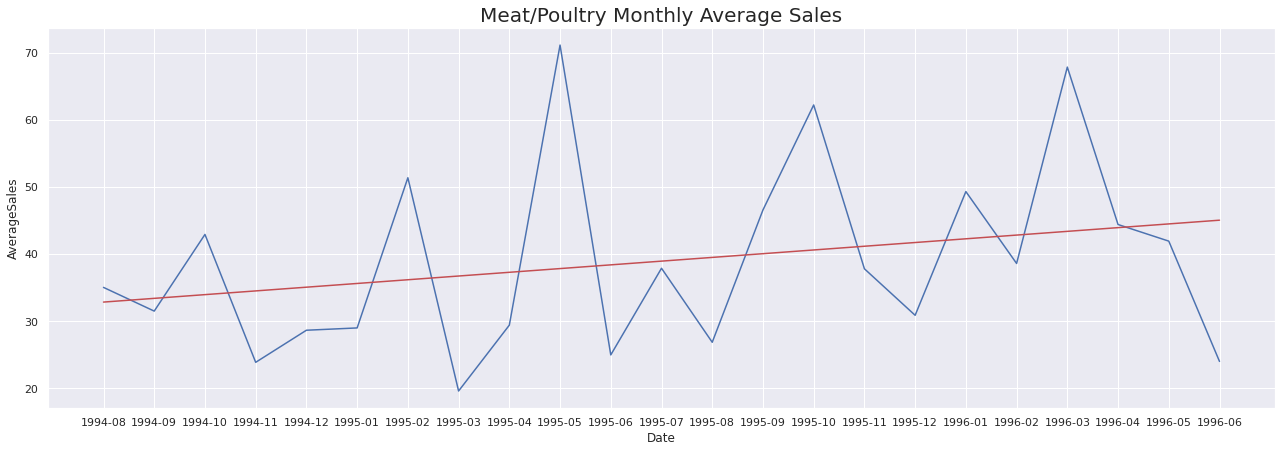

In [40]:
avgsales_mtp = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Meat/Poultry'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_mtp.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_mtp, x="Date", y="AverageSales")
plot.set_title('Meat/Poultry Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_mtp.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_mtp.Date, p(x), c="r")

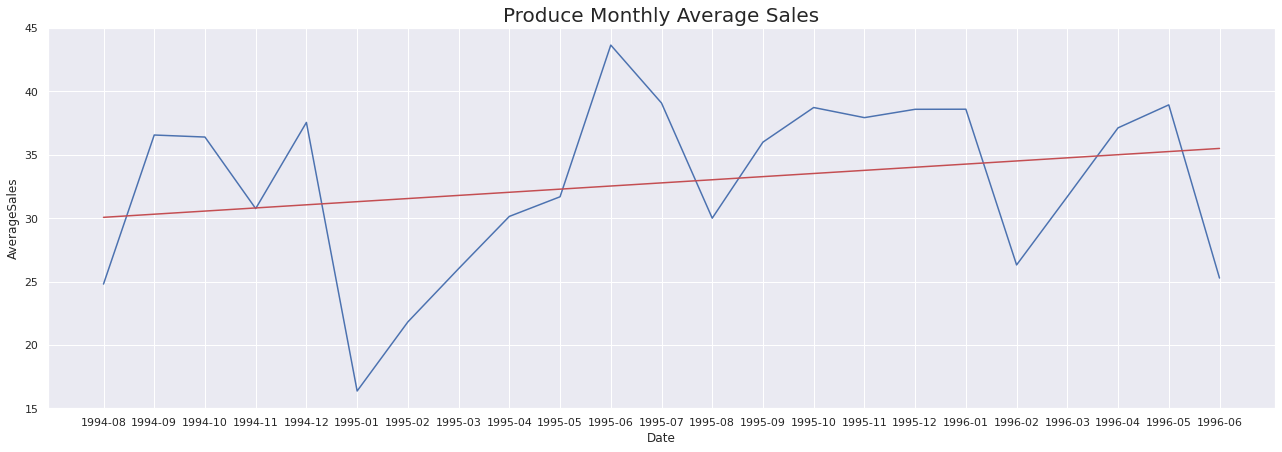

In [41]:
avgsales_prd = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Produce'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_prd.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_prd, x="Date", y="AverageSales")
plot.set_title('Produce Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_prd.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_prd.Date, p(x), c="r")

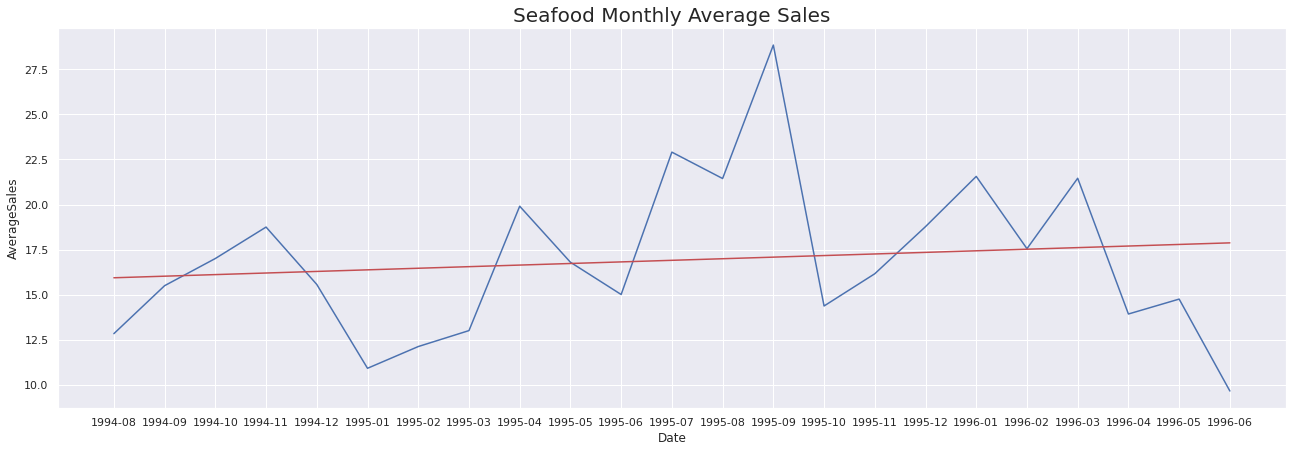

In [42]:
avgsales_sfd = pysqldf("""
SELECT strftime('%Y-%m', o.OrderDate) AS Date,
    SUM(d.UnitPrice * d.Quantity * (1 - d.Discount)) / SUM(d.Quantity) AS AverageSales
FROM orders AS o
INNER JOIN order_details AS d
    ON d.OrderID = o.OrderID
INNER JOIN products AS p
    ON p.ProductName = d.Product
WHERE p.Category = 'Seafood'
GROUP BY Date, p.Category;
""")

x = range(0, len(avgsales_sfd.Date))

plt.figure(figsize=(22, 7))
plot = sns.lineplot(data=avgsales_sfd, x="Date", y="AverageSales")
plot.set_title('Seafood Monthly Average Sales', fontsize=20)

z = np.polyfit(x, avgsales_sfd.AverageSales, 1)
p = np.poly1d(z)
plt.plot(avgsales_sfd.Date, p(x), c="r")

Kategori produk yang memiliki kecenderungan penjualan rata-rata bulanan <b>meningkat</b>:
1. Condiments
2. Dairy Products
3. Grains/Cereals
4. Meat/Poultry
5. Produce
6. Seafood

Ketagori produk yang memilki kecenderungan penjualan rata-rata bulanan <b>menurun</b>:
Confections

Untuk kategori produk Beverages, trend line menunjukkan adanya peningkatan, namun <em>nilainya sangat kecil</em>.

### f. Wilayah mana yang paling banyak melakukan pembelian?

In [43]:
pysqldf("""
SELECT o.ShipCountry,
    COUNT(o.ShipCountry) AS OrderCount
FROM orders AS o
GROUP BY o.ShipCountry
ORDER BY OrderCount DESC;
""")

,ShipCountry,OrderCount
0,USA,122
1,Germany,122
2,Brazil,83
3,France,77
4,UK,56
5,Venezuela,46
6,Austria,40
7,Sweden,37
8,Canada,30
9,Mexico,28


Wilayah yang paling banyak melakukan pembelian: <b>USA dan Germany</b>

### g. Apakah ada kaitan antara suatu produk dengan wilayahnya?
Sebagai pengukur, kami mencatat perhitungan produk berdasarkan: 
* Total penjualan terbesar 
* Volume terbesar tiap negara

In [44]:
countries = pysqldf("""
SELECT orders.`ShipCountry` AS country
FROM orders
GROUP BY orders.ShipCountry
""")
countries

,country
0,Argentina
1,Austria
2,Belgium
3,Brazil
4,Canada
5,Denmark
6,Finland
7,France
8,Germany
9,Ireland


In [45]:
volume_by_country = {}
for i in range(len(countries.country)):    
    query = pysqldf(f"""
    SELECT strftime('%Y-%m', orders.OrderDate) AS Month,
        order_details.Product,
        SUM(order_details.Quantity) AS TotalSold
    FROM order_details
    INNER JOIN orders
        ON orders.OrderID = order_details.OrderID
    WHERE orders.ShipCountry = '{countries.country[i]}'
    GROUP BY Month, order_details.product
    ORDER BY TotalSold DESC
    """)
    print(countries.country[i])
    volume_by_country[countries.country[i]] = {}
    print(query)
    print("================================================================")
    for j in range(len(query.Product)):
        if query.Product[j] not in volume_by_country[countries.country[i]].keys():
            volume_by_country[countries.country[i]][query.Product[j]] = 1
        else:
            volume_by_country[countries.country[i]][query.Product[j]] += 1

Argentina
      Month                          Product  TotalSold
0   1996-04                   Queso Cabrales         30
1   1995-03                 Boston Crab Meat         20
2   1996-02             Rhönbräu Klosterbier         20
3   1996-03                   Ravioli Angelo         20
4   1996-04           Chef Anton's Gumbo Mix         20
5   1996-04                    Sasquatch Ale         20
6   1996-05        Laughing Lumberjack Lager         20
7   1996-04  Original Frankfurter grüne Soße         15
8   1996-04           Sir Rodney's Marmalade         15
9   1995-02              Sir Rodney's Scones         12
10  1995-02                             Tofu         12
11  1995-05  Jack's New England Clam Chowder         10
12  1995-11                   Sirop d'érable         10
13  1996-03                       Röd Kaviar         10
14  1996-04                     Lakkalikööri         10
15  1996-05                          Geitost         10
16  1996-04                Rössle Saue

In [46]:
volume_by_country

{'Argentina': {'Queso Cabrales': 1,
  'Boston Crab Meat': 1,
  'Rhönbräu Klosterbier': 1,
  'Ravioli Angelo': 1,
  "Chef Anton's Gumbo Mix": 1,
  'Sasquatch Ale': 1,
  'Laughing Lumberjack Lager': 1,
  'Original Frankfurter grüne Soße': 1,
  "Sir Rodney's Marmalade": 2,
  "Sir Rodney's Scones": 2,
  'Tofu': 1,
  "Jack's New England Clam Chowder": 1,
  "Sirop d'érable": 1,
  'Röd Kaviar': 1,
  'Lakkalikööri': 1,
  'Geitost': 1,
  'Rössle Sauerkraut': 1,
  'Manjimup Dried Apples': 1,
  'Ipoh Coffee': 1,
  'Gumbär Gummibärchen': 1,
  'Scottish Longbreads': 1,
  'Mascarpone Fabioli': 1,
  'Pavlova': 1,
  "Uncle Bob's Organic Dried Pears": 1,
  'Konbu': 1,
  'Mozzarella di Giovanni': 1,
  'Steeleye Stout': 1,
  'Spegesild': 1,
  'Raclette Courdavault': 1,
  'Côte de Blaye': 1,
  'Maxilaku': 1,
  'Gorgonzola Telino': 1},
 'Austria': {'Sasquatch Ale': 1,
  'Chartreuse verte': 2,
  'Wimmers gute Semmelknödel': 5,
  "Sirop d'érable": 3,
  'Manjimup Dried Apples': 1,
  'Guaraná Fantástica': 4,
 

Kalau dilihat dari Volume penjualan:
* Argentina: Karena kurang data dari tahun 1994, asumsinya adalah karena memang belum mencapai negara itu. Produk favoritnya adalah SauerKraut
* Austria: Alice Mutton dan Chang masing-masing sudah memiliki volume terbanyak lebih dari satu kali
* Belgium: Pembeliannya cukup merata, tetapi tema utama adalah Makanan
* Brazil: Produk yang sering dipesan adalah Filo Mix, Queso Cabrales, dan Gnocchi di nonna Alice
* Canada: Produk yang sering dipesan adalah Guarana Fantastica, serta 2 produk favoritnya adalah jenis Keju
* Denmark: Produk yang sering dipesan adalah Boston Crab Meat
* Finland: Produk yang sering dipesan adalah Chai
* France:  Produk yang sering dipesan adalah Gnocchi di nonna Alice, Gudbrandsdalsost, dan Flotemysost
* Germany: Produk yang sering dipesan adalah Boston Crab Meat, dan Carnarvon Tigers
* Ireland: Produk yang sering dipesan adalah Louisiana Fiery Hot Pepper, dan Chang.
* Italy: Produk yang sering dipesan adalah Guarana Fantastica, dan Filo Mix
* Mexico: Produk yang sering dipesan adalah Alice Mutton, Camembert  Pierrot, dan Boston Crab Meat
* Norway: Tidak melakukan banyak transaksi, sebaiknya tidak fokus ke sana dulu
* Poland: Tidak melakukan banyak transaksi, sebaiknya tidak fokus ke sana dulu
* Portugal: Produk yang sering dipesan adalah Camember Pierrot, dan Gnocchi di nonna Alice
* Spain: Produk yang sering dipesan adalah Louisiana Fiery Hot Pepper Sauce, Camembert Pierrot, Alice Mutton. 
* Sweden: Varietasnya tidak sebanyak negara lain. Sering memesan Chang, Clam Chowder, Ikura, Chartreuse verte, Gula Malacca.
* Switzerland: Sering memesan Camembert Pierrot
* UK: Sering memesan Camembert Pierrot, Filo Mix, Outback Lager
* USA: Pemesanan terbanyak. Sering memesan, Gnocchi di nonna Alice, Gula Malacca, Chang
* Venezuela: Sering memesan Boston Crab Meat, Konbu ,Chai, Camembert Pierrot.

In [47]:
total_sales_by_country = {}
for i in range(len(countries.country)):    
    query = pysqldf(f"""
    SELECT strftime('%Y-%m', orders.OrderDate) AS Month,
        order_details.Product,
    SUM(order_details.UnitPrice * order_details.Quantity * (1 - order_details.Discount)) AS TotalSales
    FROM order_details
    INNER JOIN orders
        ON orders.OrderID = order_details.OrderID
    WHERE orders.ShipCountry = '{countries.country[i]}'
    GROUP BY Month
    ORDER BY TotalSales DESC
    """)
    print(countries.country[i])
    print(query)
    total_sales_by_country[countries.country[i]] = {}
    print("================================================================")
    for j in range(len(query.Product)):
        if query.Product[j] not in total_sales_by_country[countries.country[i]].keys():
            total_sales_by_country[countries.country[i]][query.Product[j]] = 1
        else:
            total_sales_by_country[countries.country[i]][query.Product[j]] += 1

Argentina
     Month                          Product  TotalSales
0  1996-04                Rössle Sauerkraut      3645.8
1  1996-02                      Ipoh Coffee      1409.0
2  1996-03                       Röd Kaviar       866.7
3  1995-11            Manjimup Dried Apples       706.0
4  1995-03                 Boston Crab Meat       443.4
5  1996-05                         Maxilaku       381.0
6  1995-02              Sir Rodney's Scones       319.2
7  1995-05  Jack's New England Clam Chowder       225.5
8  1995-06             Raclette Courdavault       110.0
9  1996-01                Gorgonzola Telino        12.5
Austria
      Month                        Product  TotalSales
0   1996-05                   Pâté chinois  18774.7500
1   1994-12                  Côte de Blaye  15681.7850
2   1996-01                  Aniseed Syrup  13453.6750
3   1995-05         Gnocchi di nonna Alice   8623.4500
4   1996-02              Camembert Pierrot   8407.0000
5   1995-03                   Alice 

In [48]:
total_sales_by_country

{'Argentina': {'Rössle Sauerkraut': 1,
  'Ipoh Coffee': 1,
  'Röd Kaviar': 1,
  'Manjimup Dried Apples': 1,
  'Boston Crab Meat': 1,
  'Maxilaku': 1,
  "Sir Rodney's Scones": 1,
  "Jack's New England Clam Chowder": 1,
  'Raclette Courdavault': 1,
  'Gorgonzola Telino': 1},
 'Austria': {'Pâté chinois': 1,
  'Côte de Blaye': 1,
  'Aniseed Syrup': 1,
  'Gnocchi di nonna Alice': 1,
  'Camembert Pierrot': 1,
  'Alice Mutton': 3,
  'Carnarvon Tigers': 1,
  'Boston Crab Meat': 1,
  'Guaraná Fantástica': 1,
  'Gumbär Gummibärchen': 1,
  'Gudbrandsdalsost': 1,
  'Chang': 2,
  'Tunnbröd': 1,
  'Fløtemysost': 1,
  'Gorgonzola Telino': 1,
  'Singaporean Hokkien Fried Mee': 1,
  'Pavlova': 1},
 'Belgium': {'Gnocchi di nonna Alice': 1,
  'Chang': 1,
  'Fløtemysost': 1,
  'Camembert Pierrot': 1,
  'Escargots de Bourgogne': 1,
  'Ipoh Coffee': 1,
  'Gumbär Gummibärchen': 1,
  'Alice Mutton': 1,
  'Singaporean Hokkien Fried Mee': 1,
  'Mozzarella di Giovanni': 1,
  'Gudbrandsdalsost': 1},
 'Brazil': {'

Kalau dilihat dari 

# 5. Identify the Best Possible Solution

### 1. Produk <br>
Dari data yang diperoleh pada no 4g, kita dapat mencari tahu produk apa yang disukai secara internasional. Dengan demikian, kita dapat mengetahui kurang lebih produk apa yang dapat direkomendasikan secara global.


In [49]:
popular_products_by_volume = {}
for key, value in volume_by_country.items():
    for product, count in value.items():
        if product not in popular_products_by_volume.keys():
            popular_products_by_volume[product] = count
        else:
            popular_products_by_volume[product] += count

dict(sorted(popular_products_by_volume.items(), key=lambda item: item[1], reverse=True))

{'Raclette Courdavault': 50,
 'Guaraná Fantástica': 49,
 'Camembert Pierrot': 48,
 "Jack's New England Clam Chowder": 46,
 'Gorgonzola Telino': 46,
 'Gnocchi di nonna Alice': 46,
 'Rhönbräu Klosterbier': 41,
 'Pavlova': 41,
 'Chang': 40,
 'Boston Crab Meat': 39,
 'Fløtemysost': 39,
 'Original Frankfurter grüne Soße': 38,
 'Queso Cabrales': 37,
 'Mozzarella di Giovanni': 37,
 'Tarte au sucre': 37,
 'Outback Lager': 37,
 'Lakkalikööri': 36,
 'Manjimup Dried Apples': 36,
 'Konbu': 36,
 'Steeleye Stout': 36,
 "Sir Rodney's Scones": 35,
 'Teatime Chocolate Biscuits': 35,
 'Chai': 35,
 'Alice Mutton': 34,
 'Rössle Sauerkraut': 33,
 'Scottish Longbreads': 33,
 'Tourtière': 33,
 'Ikura': 32,
 'Louisiana Fiery Hot Pepper Sauce': 32,
 'Geitost': 31,
 'Gudbrandsdalsost': 31,
 'Chartreuse verte': 30,
 'Pâté chinois': 30,
 'Singaporean Hokkien Fried Mee': 30,
 'Wimmers gute Semmelknödel': 29,
 'Nord-Ost Matjeshering': 29,
 'Thüringer Rostbratwurst': 29,
 'Inlagd Sill': 29,
 'Ipoh Coffee': 28,
 "Unc

In [50]:
print(len(popular_products_by_volume))

77


Jika kita lihat popularitas produk berdasarkan volume diseluruh dunia, kita dapat dengan yakin merekomendasikan:
1. Camember Pierrot
2. Boston Crab Meat
3. Chang, dst

Semakin besar nilai yang didapatkan pada produk tersebut, semakin yakin kita akan popularitasnya di seluruh dunia.

Kemudian, dari seluruh 77 produk yang disediakan Northwind, hanya 12 produk yang tidak pernah menjadi <em>best-selling</em> berdasarkan volume penjualan dimanapun di dunia. Jadi, kita dapat mengetahui 12 produk mana saja yang kurang terkenal.

In [51]:
popular_products_by_sales = {}
for key, value in total_sales_by_country.items():
    for product, count in value.items():
        if product not in popular_products_by_sales.keys():
            popular_products_by_sales[product] = count
        else:
            popular_products_by_sales[product] += count

dict(sorted(popular_products_by_sales.items(), key=lambda item: item[1], reverse=True))

{'Camembert Pierrot': 19,
 'Boston Crab Meat': 17,
 'Gnocchi di nonna Alice': 16,
 'Chang': 16,
 'Alice Mutton': 15,
 'Guaraná Fantástica': 15,
 'Fløtemysost': 14,
 'Chai': 12,
 'Filo Mix': 11,
 "Jack's New England Clam Chowder": 9,
 'Louisiana Fiery Hot Pepper Sauce': 9,
 'Carnarvon Tigers': 8,
 'Chartreuse verte': 8,
 'Ipoh Coffee': 7,
 'Gorgonzola Telino': 7,
 'Gudbrandsdalsost': 7,
 'Konbu': 7,
 'Gula Malacca': 7,
 'Aniseed Syrup': 6,
 'Gumbär Gummibärchen': 6,
 'Ikura': 6,
 "Chef Anton's Cajun Seasoning": 6,
 'Manjimup Dried Apples': 5,
 'Escargots de Bourgogne': 5,
 'Geitost': 5,
 'Raclette Courdavault': 4,
 'Côte de Blaye': 4,
 'Pavlova': 4,
 'Mozzarella di Giovanni': 4,
 'Queso Cabrales': 4,
 'Nord-Ost Matjeshering': 4,
 'Outback Lager': 4,
 'Inlagd Sill': 4,
 'Original Frankfurter grüne Soße': 3,
 'Rössle Sauerkraut': 2,
 'Maxilaku': 2,
 "Sir Rodney's Scones": 2,
 'Pâté chinois': 2,
 'Tunnbröd': 2,
 'Singaporean Hokkien Fried Mee': 2,
 'NuNuCa Nuß-Nougat-Creme': 2,
 'Steeleye 

In [52]:
popular_products_by_volume == popular_products_by_sales

False

Ternyata produk yang popular secara volume juga popular secara total penjualan. Maka konklusi tetap sama/makin kuat, untuk merekomendasi produk-produk di atas di seluruh dunia berdasarkan nilai pada produk.

### 2. Suppliers

In [53]:
pysqldf("""
SELECT suppliers.CompanyName,
    SUM(order_details.UnitPrice * order_details.Quantity * (1 - order_details.Discount)) AS TotalSales
FROM suppliers
INNER JOIN products
    ON products.Supplier = suppliers.CompanyName
INNER JOIN order_details
    ON order_details.Product = products.ProductName
GROUP BY suppliers.CompanyName
ORDER BY TotalSales DESC;
""")

,CompanyName,TotalSales
0,Aux joyeux ecclésiastiques,153691.2750
1,Plutzer Lebensmittelgroßmärkte AG,145372.3995
2,Gai pâturage,117981.1800
3,"Pavlova, Ltd.",106459.7755
4,"G'day, Mate",65626.7700
5,Forêts d'érables,61587.5700
6,Pasta Buttini s.r.l.,50254.6100
7,Formaggi Fortini s.r.l.,48225.1650
8,"Specialty Biscuits, Ltd.",46243.9800
9,Norske Meierier,43141.5100


In [54]:
pysqldf("""
SELECT suppliers.CompanyName,
    SUM(order_details.Quantity) AS ProductsSold
FROM suppliers
INNER JOIN products
    ON products.Supplier = suppliers.CompanyName
INNER JOIN order_details
    ON order_details.Product = products.ProductName
GROUP BY suppliers.CompanyName
ORDER BY ProductsSold DESC;
""")

,CompanyName,ProductsSold
0,Plutzer Lebensmittelgroßmärkte AG,4072
1,"Pavlova, Ltd.",3937
2,Gai pâturage,3073
3,"Specialty Biscuits, Ltd.",2851
4,Norske Meierier,2526
5,Formaggi Fortini s.r.l.,2500
6,Exotic Liquids,2213
7,"G'day, Mate",2108
8,New England Seafood Cannery,2084
9,Leka Trading,1878


Berdasarkan <b>total penjualan</b>, supplier yang paling banyak mendapatkan revenue yaitu Aux joyeux ecclésiastiques. Sedangkan, berdasarkan <b>jumlah produk terjual</b>, supplier yang paling banyak menjual produk yaitu Plutzer Lebensmittelgroßmärkte AG.

Berdasarkan analisa di atas, kami dapat menyimpulkan bahwa kedua supplier tersebut memiliki potensi yang besar dalam menjual produk yang di-supply nya. Supplier Aux joyeux ecclésiastiques berhasil mendapatkan revenue tertinggi dibandingkan supplier lainnya dan supplier Plutzer Lebensmittelgroßmärkte AG berhasil menjual produk paling banyak dibandingkan supplier lainnya.<br><br>

<b>Rekomendasi</b>: <br>
Perusahaan Northwind dapat memperbanyak produk yang disupply oleh </em>top 10 supplier</em> yang termasuk dalam masing-masing kategori (berdasarkan total penjualan dan jumlah produk terjual).

### 3. Customers

In [55]:
pysqldf("""
SELECT customers.CompanyName,
    COUNT(orders.Customer) AS OrderFrequency
FROM customers
INNER JOIN orders
    ON orders.Customer = customers.CompanyName
GROUP BY customers.CompanyName
ORDER BY OrderFrequency DESC;
""")

,CompanyName,OrderFrequency
0,Save-a-lot Markets,31
1,Ernst Handel,30
2,QUICK-Stop,28
3,Hungry Owl All-Night Grocers,19
4,Folk och fä HB,19
...,...,...
84,Consolidated Holdings,3
85,Bólido Comidas preparadas,3
86,Lazy K Kountry Store,2
87,GROSELLA-Restaurante,2


In [56]:
pysqldf("""
SELECT customers.CompanyName,
    SUM(order_details.Quantity) AS ProductsPurchased,
    SUM(order_details.UnitPrice * order_details.Quantity * (1 - order_details.Discount)) AS Revenue
FROM customers
INNER JOIN orders
    ON orders.Customer = customers.CompanyName
INNER JOIN order_details
    ON order_details.OrderID = orders.OrderID
GROUP BY customers.CompanyName
ORDER BY ProductsPurchased DESC;
""")

,CompanyName,ProductsPurchased,Revenue
0,Save-a-lot Markets,4958,104361.9500
1,Ernst Handel,4543,104874.9785
2,QUICK-Stop,3961,110277.3050
3,Hungry Owl All-Night Grocers,1684,49979.9050
4,Frankenversand,1525,26656.5595
...,...,...,...
84,Galería del gastrónomo,42,836.7000
85,GROSELLA-Restaurante,34,1488.7000
86,North/South,30,649.0000
87,Lazy K Kountry Store,20,357.0000


Berdasarkan jumlah pesanan yang dilakukan dan jumlah produk yang dibelinya, customer Save-a-lot Markets merupakan customer yang paling sering memesan produk Northwind sebanyak 31 kali dengan jumlah produk 4.958.<br><br>

<b>Rekomendasi</b>:<br>
Perusahaan Northwind dapat memberikan semacam <em>reward</em> kepada customer yang telah melakukan transaksi minimum sebanyak 15 kali. Dengan demikian, customer-customer tersebut termotivasi untuk semakin sering melakukan pembelian produk Northwind.

Kemudian, rekomendasi yang sama juga dapat diberikan kepada customer yang membeli produk dalam jumlah yang banyak. Selain itu, dapat juga diberikan potongan harga kepada customer yang membeli banyak produk sekaligus dalam satu kali pemesanan atau jika telah mencapai minimum pembelanjaan tertentu.

### 4. Shipping
Kita cuman perlu menghitung berapa kali sebuah layanan shipment dilakukan. Karena sebanyak/sesedikit produk yang dipesan akan tetap membayar kepada perusahaan jasa shipping. 

In [57]:
pysqldf("""
SELECT orders.ShipVia AS company_name, COUNT(orders.ShipVia) AS count
FROM orders
GROUP BY company_name
""")

,company_name,count
0,Federal Shipping,255
1,Speedy Express,249
2,United Package,326


Shipping yang paling terkenal digunakan oleh customer adalah United Package.

### 5. Fokus Wilayah

In [58]:
pysqldf("""
SELECT `ShipCountry`, COUNT(`ShipCountry`) AS 'count'
FROM orders
GROUP BY `ShipCountry`  
ORDER BY `count`  DESC    
""")

,ShipCountry,count
0,USA,122
1,Germany,122
2,Brazil,83
3,France,77
4,UK,56
5,Venezuela,46
6,Austria,40
7,Sweden,37
8,Canada,30
9,Mexico,28


Apabila dilihat dari jumlah order, maka USA, Jerman, Austria, dan Brazil dapat diprioritaskan.
Berarti, dapat dilakukan pengelompokan shipping apabila memungkinkan untuk menurunkan harga kargo.

In [59]:
pysqldf("""
SELECT `ShipCountry`, SUM(order_details.`UnitPrice` * order_details.`Quantity` * (1-order_details.Discount)) AS 'total_sales'
        FROM orders
        INNER JOIN order_details ON order_details.`OrderID` = orders.`OrderID`
        GROUP BY `ShipCountry`  
        ORDER BY `total_sales`  DESC;    
""")

,ShipCountry,total_sales
0,USA,245584.6105
1,Germany,230284.6335
2,Austria,128003.8385
3,Brazil,106925.7765
4,France,81358.3225
5,UK,58971.3100
6,Venezuela,56810.6290
7,Sweden,54495.1400
8,Canada,50196.2900
9,Ireland,49979.9050


Apabila dilihat dari jumlah penjualan, USA dan Jerman jauh melampaui penjualan peringkat ke-3, dst (hampir dua kali lipat).
Berarti fokus dalam marketing atau penjualan lebih baik dilakukan pada negara USA dan Jerman.